<a href="https://colab.research.google.com/github/yin-penghang/AMAT593/blob/main/16_Deep-Neural-Networks/01_Deep%20Neural%20Networks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

# Deep Neural Networks

**The code for network training should be executed within Google's [Colab Notebook](https://colab.research.google.com/github/yin-penghang/AMAT593/blob/main/16_Deep-Neural-Networks/01_Deep%20Neural%20Networks.ipynb) using GPU.**

## Basics 

In deep learning, we take deep neural networks as the model architecture. The word "deep" in "deep learning" refers to the number of layers through which the data is transformed. Deep learning architectures such as convolutional neural networks, recurrent neural networks and deep reinforcement learning have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.

### Why GPU For Deep Learning 

A CPU in general completes its task in a **sequential** manner, whereas a GPU is the able to process a large number of simple calculations **in parallel**, which makes it very suitable for computing matrix multiplications and convolutions in deep learning.

### Deep Learning Libraries and Platforms

There are a number of open-source deep learning libraries and platforms available. Among them, [**PyTorch** ](https://pytorch.org/)by Facebook and [**TensorFlow**](https://www.tensorflow.org/) by Google are the most popular for academic and research activities.

We will use TensorFlow for lecturing. You need to install Python dependecies ``tensorflow`` and ``keras`` for deep learning:
- ``pip install tensorflow``
- ``pip install keras``

Building neural network models is like playing Lego, deep learning libraries provide the modules of different types of layers — Lego blocks  — to construct network architectures in a flexible way. They also include various convenient utility functions such as metrics as well as optimizers, making deep learning easy to train and deploy.

## Enabling GPU in Colab Notebook

GPUs can process data several orders of magnitude faster than a CPU due to **massive parallelism**, although GPUs are not as versatile as CPUs. 

However, setting up a GPU so that it is ready for deep learning can be painful, as it requires the installation of several open-source softwares whose respective versions need to be compatible. **We can skip the software requirement if using GPU-enbaled Colab Notebook.**

First, you'll need to enable GPU for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [1]:
import matplotlib.pyplot as plt
from keras.utils import np_utils

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional layer over a
random image and manually places the resulting ops on either the CPU or the GPU to compare execution speed.

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch size x height x width x channel).')
print('\n CPU time (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('\n GPU time (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('\n GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch size x height x width x channel).

 CPU time (s):
3.6325147139999956

 GPU time (s):
0.045193765999997026

 GPU speedup over CPU: 80x


## Deep Learning with Local GPU

There are limitations of using Colab's GPU for deep learning. For example, the GPU allocation per non-paid user is restricted to maximum 12 hours at a time. The next time you can use it will probably be after 12 hours or once another user has given up GPU ability. 

If you have a bare machine with an **NVIDIA** GPU card available, you may want to set up your own computers to be deep learning ready. The main reason that you need an NVIDIA GPU is because of [**CUDA**](https://en.wikipedia.org/wiki/CUDA). CUDA is a proprietary programming framework developed by NVIDIA that facilitates massive parallelization of computing tasks using the cores in an NVIDIA GPU. You'll also need to install [**cuDNN**](https://developer.nvidia.com/cudnn), a GPU-accelerated library of primitives for deep neural networks built using CUDA.

Please check out [this article](https://spltech.co.uk/building-my-first-pc-for-deep-learning/) for details. 

## MNIST Data preparation

Load MNIST dataset from Keras and Preprocess

In [2]:
from keras.datasets import mnist

load (download if needed) the MNIST dataset

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(X_train.shape), print(y_train.shape)

(60000, 28, 28)
(60000,)


(None, None)

In [5]:
print(X_test.shape), print(y_test.shape)

(10000, 28, 28)
(10000,)


(None, None)

Plot 4 images as gray scale

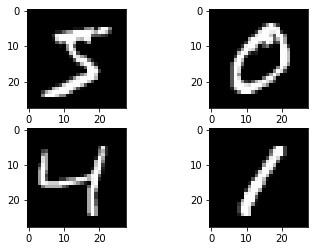

In [6]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

## Warmup Example 1 : Logistic Regression

To use logistic regression model, we will need to first flatten out the image samples into vectors. 

<img src='../figs/16_MNIST_LR.png' width = '800'>

Flatten 28x28 images to a 784 vector for each image

In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

Normalize inputs from 0-255 to 0-1

In [8]:
X_tr = X_train / 255
X_te = X_test / 255

Encode one-hot labels which are 10-D vectors, e.g., 
- digit 0 -> label (1,0,0,...,0)
- digit 1 -> label (0,1,0,...,0)
- digit 2 -> label (0,0,1,...,0)
- ...
- digit 9 -> label (0,0,0,...,1)

In [9]:
y_tr = np_utils.to_categorical(y_train,10)
y_te = np_utils.to_categorical(y_test,10)
num_classes = y_te.shape[1]

print(y_tr.shape)

(60000, 10)


We build the logit model by adding a dense layer (parameterized linear transform), followed by softmax function that normalizes outputs into probabilities which sum to one. Then we use ``categorical_crossentropy`` cross-entropy loss and ``adam`` optimization algorithm. 

[**Adam**](https://arxiv.org/pdf/1412.6980.pdf) is a SGD variant with adaptive learning rate for each individual parameter. It is an viable alternative to Nesterov accelerated SGD and has gained much popularity in deep learning, because it requires only **minimum tuning of learning rate and other algorithmic hyper-parameters**.

In [10]:
from keras.models import Sequential
from keras.layers import Dense

In [11]:
def logit_model():
  # create model
  model = Sequential()
  # Fully-connected Layer with Softmax output
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model with corss entropy loss and Adam optimizer
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model

* `ModelCheckpoint` callback will ensure that the weights of model with the best validation accuracy is saved for the run for us to use later.  
* use `EarlyStopping` callback to interrupt training when the validation accuracy
is not improving for `patience=7` consecutive epochs.


In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
path_checkpoint = "logit_checkpoint.h5"
es_callback = EarlyStopping(monitor="val_accuracy", patience=7)

modelckpt_callback = ModelCheckpoint(
    monitor="val_accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

In [15]:
# build the model
model = logit_model()
# Fit the model
model.fit(X_tr, y_tr, validation_data=(X_te, y_te), 
          epochs=40, batch_size=100, 
          callbacks=[es_callback, modelckpt_callback], 
          verbose=2)

Epoch 1/40
600/600 - 4s - loss: 0.6224 - accuracy: 0.8456 - val_loss: 0.3602 - val_accuracy: 0.9059

Epoch 00001: val_loss improved from inf to 0.36018, saving model to logit_checkpoint.h5
Epoch 2/40
600/600 - 1s - loss: 0.3456 - accuracy: 0.9060 - val_loss: 0.3073 - val_accuracy: 0.9143

Epoch 00002: val_loss improved from 0.36018 to 0.30734, saving model to logit_checkpoint.h5
Epoch 3/40
600/600 - 1s - loss: 0.3094 - accuracy: 0.9145 - val_loss: 0.2903 - val_accuracy: 0.9207

Epoch 00003: val_loss improved from 0.30734 to 0.29029, saving model to logit_checkpoint.h5
Epoch 4/40
600/600 - 1s - loss: 0.2917 - accuracy: 0.9187 - val_loss: 0.2783 - val_accuracy: 0.9230

Epoch 00004: val_loss improved from 0.29029 to 0.27830, saving model to logit_checkpoint.h5
Epoch 5/40
600/600 - 1s - loss: 0.2818 - accuracy: 0.9212 - val_loss: 0.2753 - val_accuracy: 0.9245

Epoch 00005: val_loss improved from 0.27830 to 0.27530, saving model to logit_checkpoint.h5
Epoch 6/40
600/600 - 1s - loss: 0.2749 

Chekc the validation accuracy of the checkpointed model by loading the saved weights.

In [18]:
# load the saved weights 
model.load_weights(path_checkpoint)
scores = model.evaluate(X_te, y_te, verbose=0)
print("\n Best validation accuracy: %.2f%%" % (scores[1]*100))


 Best validation accuracy: 92.83%


**We can check the total number of trainable parameters in the model**:

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


## Warmup Example 2 : Two-Layer Networks

We can view logistic regression model as a **one-dense-layer network** with 784x10 weight matrix. Next, we aim to improve the prediction accuracy, adding one more dense layer with a nonlinear activation layer (applied **entry-wise**), so-called **rectified linear units (ReLU)** to increase the model capacity/complexity. 

<img src='../figs/16_ReLU.png'>

However, adding dense layers will result in **tremendous growth of the number of model parameters.** 

**Define Two-Layer Model**

Create a new instance of a model object using sequential model API. Then add two Dense linear layers, one ReLU activation layer, and Softmax output layer to the architecture. Finally, compile the model with the ``categorical_crossentropy`` loss function and ``adam`` optimization algorithm. When compiling the model, add ``metrics=[‘accuracy’]`` to calculate the accuracy of the model.

In [19]:
def two_layer_model():
  # create model
  model = Sequential()
  # Fully-connected Layer with ReLU activation
  model.add(Dense(num_pixels, activation='relu'))
  # Fully-connected Layer with Softmax output
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model with corss entropy loss and Adam optimizer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Set up the callbacks for checkpoint and early stopping

In [20]:
path_checkpoint = "2layer_checkpoint.h5"
es_callback = EarlyStopping(monitor="val_accuracy", patience=7)

modelckpt_callback = ModelCheckpoint(
    monitor="val_accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

Build, train, and evaluate the model

In [21]:
# build the model
model = two_layer_model()
# Fit the model
# Fit the model
model.fit(X_tr, y_tr, validation_data=(X_te, y_te), 
          epochs=50, batch_size=100, 
          callbacks=[es_callback, modelckpt_callback], 
          verbose=2)

Epoch 1/50
600/600 - 2s - loss: 0.2308 - accuracy: 0.9334 - val_loss: 0.1094 - val_accuracy: 0.9672

Epoch 00001: val_accuracy improved from -inf to 0.96720, saving model to 2layer_checkpoint.h5
Epoch 2/50
600/600 - 1s - loss: 0.0900 - accuracy: 0.9733 - val_loss: 0.0834 - val_accuracy: 0.9738

Epoch 00002: val_accuracy improved from 0.96720 to 0.97380, saving model to 2layer_checkpoint.h5
Epoch 3/50
600/600 - 1s - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0679 - val_accuracy: 0.9782

Epoch 00003: val_accuracy improved from 0.97380 to 0.97820, saving model to 2layer_checkpoint.h5
Epoch 4/50
600/600 - 2s - loss: 0.0386 - accuracy: 0.9887 - val_loss: 0.0650 - val_accuracy: 0.9787

Epoch 00004: val_accuracy improved from 0.97820 to 0.97870, saving model to 2layer_checkpoint.h5
Epoch 5/50
600/600 - 2s - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0586 - val_accuracy: 0.9825

Epoch 00005: val_accuracy improved from 0.97870 to 0.98250, saving model to 2layer_checkpoint.h5
Epoch 6/50
60

In [22]:
# load the saved weights 
model.load_weights(path_checkpoint)
scores = model.evaluate(X_te, y_te, verbose=0)
print("\n Best validation accuracy: %.2f%%" % (scores[1]*100))


 Best validation accuracy: 98.52%


The two-dense-layer network has 623,290 trainable parameters:

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


## MNIST Classification with LeNet-5

LeNet-5 architecture was the first convolutional neural network, proposed by LeCun et al., 1998 in this seminal [paper](http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf). It has 5 linear layers including 3 convolutional layers and 2 dense layers. 


<img src = '../figs/16_lenet5.png'>

The original LeNet-5 architecture:

* pad each images with zeros and increase size to 32x32

* convolutional layer $C_1$ with 6 filters of size 5x5, followed by tanh activation layer. **output dimension = 28x28x6**

* 2x2 average pooling layer $S_2$ for subsampling. **output dimension = 14x14x6**

* convolutional layer $C_3$ with 16 filters of size 6x5x5, followed by tanh activation layer. **output dimension = 10x10x16**

* 2x2 average pooling layer $S_4$ for subsampling. **output dimension = 5x5x16**

* convolutional layer $C_5$ with 120 filters of size 16x5x5, followed by tanh activation layer. **output dimension = 1x1x120**

* flatten out the 120x1x1 tensor into 120-D vector.

* dense layer of 84x120 weight matrix.  **output dimension = 84**

* dense layer of 10x84 weight matrix.  **output dimension = 10**

* softmax layer


Convolutional neural networks have the following advantages:

* Convolutional layers use **weight sharing** and subsampling (known as **pooling**), leading to compact model sizes. 

* Convolutional neural networks are very good feature extractors. They outperform dense neural networks on conventional image recognition tasks and many other tasks. 


#### How a convolutional layer works (with kernel_size=(3, 3), strides = 1, padding = 1):

<img src = '../figs/16_conv2d.gif'>

* Weights (in the kernel) are re-used across the patches, so-called weight **sharing**

#### How 2x2 pooling works (with strides = 2): 

<img src = '../figs/16_maxpool.gif'>

* Each dimension is halved.

#### Feature maps output from the intermediate layers of LeNet-5 in generating predictions:

<img src = '../figs/16_lenet.gif' width = 800>


Morden convolutional nerual networks only have one dense layer on the top serving as the linear classifer with all convolutional layers beneath as the feature extractor. 

Reload the image and reshape images into 4-D array

In [32]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Set numeric type to float32 from uint8
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize value to [0, 1]
X_train /= 255
X_test /= 255

# Transform lables to one-hot encoding
y_tr = np_utils.to_categorical(y_train, 10)
y_te = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
X_tr = X_train.reshape(X_train.shape[0], 28,28,1)
X_te = X_test.reshape(X_test.shape[0], 28,28,1)


Create a new instance of a model object using sequential model API. Then add layers to the neural network as per LeNet-5 architecture. Finally, compile the model with the ``categorical_crossentropy`` loss function and SGD algorithm combined with Nesterov momentum. When compiling the model, add ``metrics=[‘accuracy’]`` to calculate the accuracy of the model.

**We made the following changes on the original LeNet-5:**

- use ReLU activation instead of tanh

- use max pooling instead of average pooling

In [28]:
from keras.layers import Conv2D, MaxPool2D, Flatten, ZeroPadding2D, Dense
from keras.models import Sequential
from tensorflow.keras import optimizers

def lenet5():
  model = Sequential()
  # C1 Convolutional Layer
    
  model.add(ZeroPadding2D(padding=(2, 2)))

  model.add(Conv2D(filters = 6, kernel_size=(5, 5), strides=1, activation='relu', input_shape=(28,28,1)))
  # S2 Pooling Layer
  model.add(MaxPool2D(pool_size=(2, 2), strides=2))

  # C3 Convolutional Layer
  model.add(Conv2D(filters = 16, kernel_size=(5, 5), strides=1, activation='relu'))

  # S4 Pooling Layer
  model.add(MaxPool2D(pool_size=(2, 2), strides=2))

  # C5 Fully Connected Convolutional Layer
  model.add(Conv2D(filters = 120, kernel_size=(5, 5), strides=1, activation='relu'))
    
  #Flatten the CNN output so that we can connect it with fully-connected layers
  model.add(Flatten())
  
  # FC6 Fully Connected Layer
  model.add(Dense(84, activation='relu'))

  # Output Layer with softmax activation
  model.add(Dense(10, activation='softmax'))

  # Compile the model
  model.compile(loss='categorical_crossentropy', optimizer = optimizers.SGD(learning_rate = 0.02, momentum=0.9, nesterov=True), metrics=['accuracy'])

  # Or, train using Adam algorithm  
 #  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  return model

Set up the callbacks for checkpoint and early stopping

In [33]:
path_checkpoint = "lenet5_checkpoint.h5"
es_callback = EarlyStopping(monitor="val_accuracy", patience=7)

modelckpt_callback = ModelCheckpoint(
    monitor="val_accuracy",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

Training and model evaluation

In [34]:
model = lenet5()
history = model.fit(X_tr, y_tr, validation_data=(X_te, y_te), 
          epochs=50, batch_size=100, 
          callbacks=[es_callback, modelckpt_callback], 
          verbose=2)

Epoch 1/50
600/600 - 32s - loss: 0.2709 - accuracy: 0.9154 - val_loss: 0.0664 - val_accuracy: 0.9773

Epoch 00001: val_accuracy improved from -inf to 0.97730, saving model to lenet5_checkpoint.h5
Epoch 2/50
600/600 - 2s - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0447 - val_accuracy: 0.9855

Epoch 00002: val_accuracy improved from 0.97730 to 0.98550, saving model to lenet5_checkpoint.h5
Epoch 3/50
600/600 - 2s - loss: 0.0478 - accuracy: 0.9851 - val_loss: 0.0367 - val_accuracy: 0.9879

Epoch 00003: val_accuracy improved from 0.98550 to 0.98790, saving model to lenet5_checkpoint.h5
Epoch 4/50
600/600 - 2s - loss: 0.0376 - accuracy: 0.9880 - val_loss: 0.0423 - val_accuracy: 0.9861

Epoch 00004: val_accuracy did not improve from 0.98790
Epoch 5/50
600/600 - 2s - loss: 0.0318 - accuracy: 0.9894 - val_loss: 0.0336 - val_accuracy: 0.9879

Epoch 00005: val_accuracy did not improve from 0.98790
Epoch 6/50
600/600 - 2s - loss: 0.0276 - accuracy: 0.9913 - val_loss: 0.0434 - val_accuracy: 0.9

In [35]:
# load the saved weights 
model.load_weights(path_checkpoint)
scores = model.evaluate(X_te, y_te, verbose=0)
print("\n Best validation accuracy: %.2f%%" % (scores[1]*100))


 Best validation accuracy: 99.18%


Let's check out the model size of LeNet-5:

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_2 (ZeroPaddin (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten_2 (Flatten)          (None, 120)              

Although the number of trainable parameters in LeNet-5 is only 1/10 of that in the two-dense-layer network, it achieves higher validation accuracy. This is due to the power of convolutional layers.

**Visualize the Training Process**

We will visualize the training process by plotting the training accuracy and loss after each epoch

Text(0, 0.5, 'Accuracy')

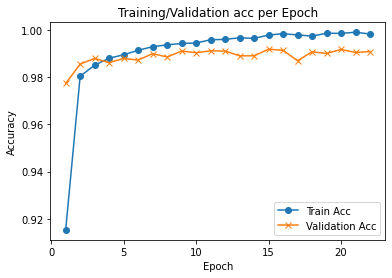

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([None] + history.history['accuracy'], 'o-')
ax.plot([None] + history.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Acc', 'Validation Acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')

Text(0, 0.5, 'Loss')

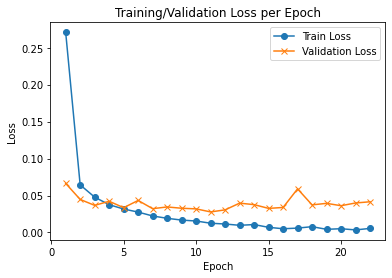

In [38]:
fig, ax = plt.subplots()
ax.plot([None] + history.history['loss'], 'o-')
ax.plot([None] + history.history['val_loss'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train Loss', 'Validation Loss'], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

### Save and Load the Full Model

It is very convenient to save the trained neural network model. You can load it whenever needed for prediction.

The model consists of multiple components:

* the architecture, or configuration, which specifies what layers the model contain, and how they're connected.

* a set of weights values (the "state of the model").

* an optimizer (defined by compiling the model).

* a set of losses and metrics (defined by compiling the model or calling add_loss() or add_metric()).

There are two formats you can use to save an entire model to disk: the TensorFlow **SavedModel** format, and the older Keras **H5 format**. **SavedModel** format is the default when you use ``model.save()``.

In [39]:
model.save('lenet5')

INFO:tensorflow:Assets written to: lenet5/assets


In [40]:
loaded_model = tf.keras.models.load_model("lenet5")

Check the test accuracy of the saved model:

In [41]:
scores = loaded_model.evaluate(X_te, y_te, verbose=0)
print("\n Testing/Validation accuracy of the saved model: %.2f%%" % (scores[1]*100))


 Testing/Validation accuracy of the saved model: 99.18%
